In [48]:
from scipy.io import loadmat, whosmat
import numpy as np
import matplotlib.pyplot as plt

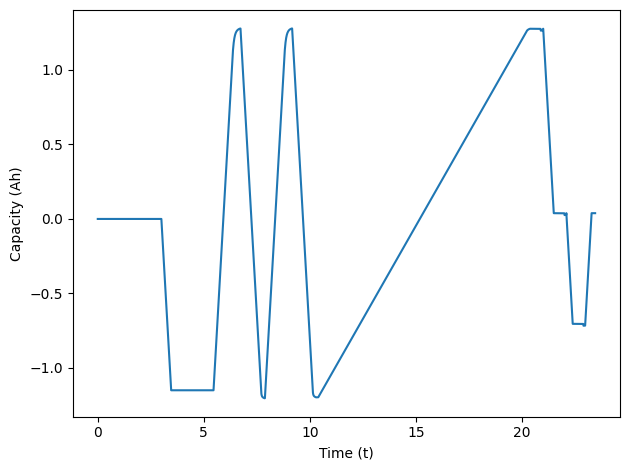

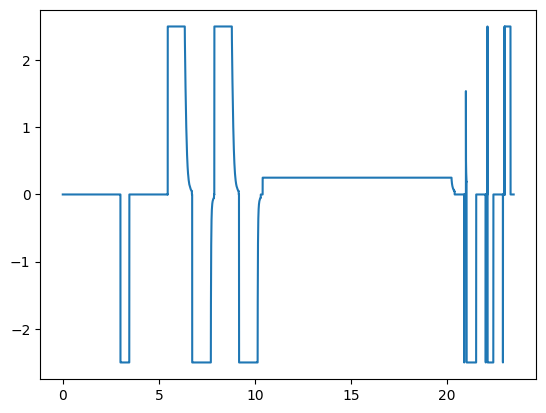

In [53]:
data = loadmat("CU_Dynamic/CU000/BW-VTC-458_7068_CU_cyc_000_BW-VTC-AgeVal.mat",
               squeeze_me=True, struct_as_record=False)["Dataset"]

data = data.__dict__


plt.plot(data["Time"], data["Ah"])
plt.ylabel("Capacity (Ah)")
plt.xlabel("Time (t)")
plt.tight_layout()
plt.show()


plt.plot(data["Time"], data["I"])

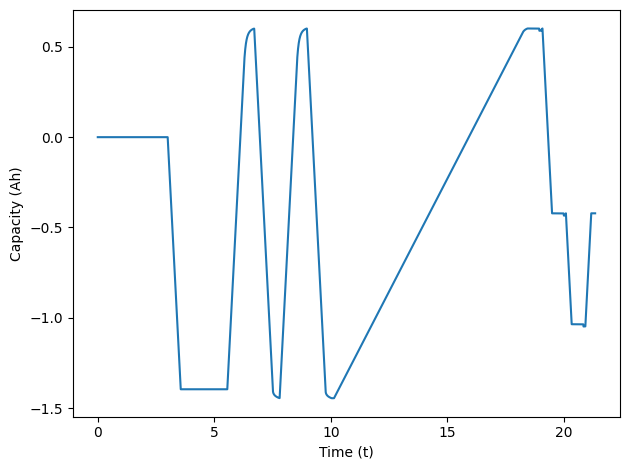

In [50]:
data = loadmat("CU_Dynamic/CU011/BW-VTC-458_8109_CU_cyc_011_BW-VTC-AgeVal.mat",
               squeeze_me=True, struct_as_record=False)["Dataset"]

data = data.__dict__

plt.plot(data["Time"], data["Ah"])
plt.ylabel("Capacity (Ah)")
plt.xlabel("Time (t)")
plt.tight_layout()
plt.show()

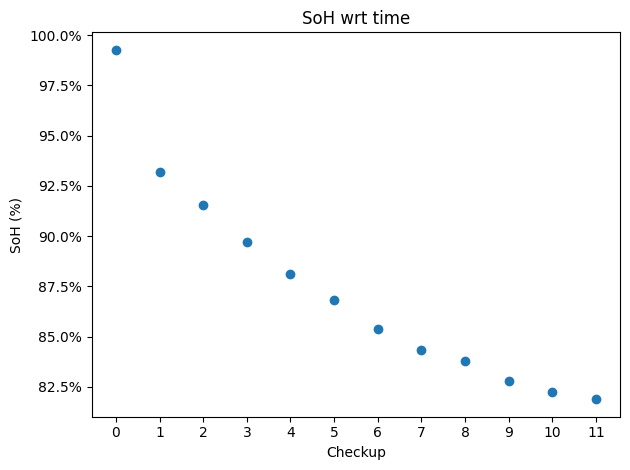

In [51]:
from os import listdir
import matplotlib.ticker as mticker

capacities = []
checkups = []

for checkup_name in sorted(listdir("CU_Dynamic")):
    if checkup_name == "failed and incomplete":
        continue
    for cell in listdir(f"CU_Dynamic/{checkup_name}"):
        if cell.startswith("BW-VTC-458"):
            data = loadmat(f"CU_Dynamic/{checkup_name}/{cell}",
               squeeze_me=True, struct_as_record=False)["Dataset"].__dict__
            current_capacity = max(data["Ah"]) - min(data["Ah"])
            capacities.append(current_capacity)
            checkups.append(int(checkup_name[2:5]))

capacities = np.array(capacities)
capacities = capacities / 0.025

plt.title("SoH wrt time")
plt.ylabel("SoH (%)")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.1f}%'))
plt.xlabel("Checkup")
plt.xticks(checkups)
plt.scatter(checkups, capacities)
plt.tight_layout()
plt.show()


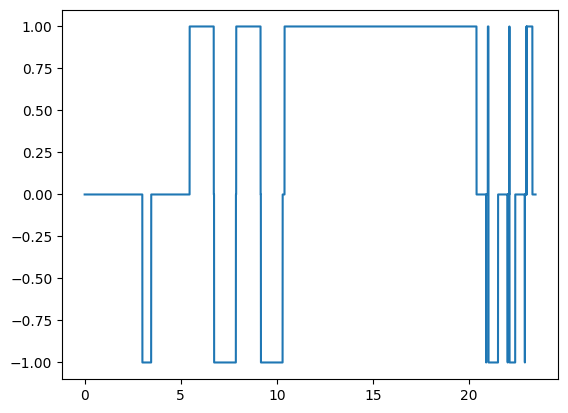

In [54]:
data = loadmat(f"CU_Dynamic/CU000/BW-VTC-458_7068_CU_cyc_000_BW-VTC-AgeVal.mat",
        squeeze_me=True, struct_as_record=False)["Dataset"].__dict__

from json import load

with open("Edited_dics/CU000/BW-VTC-458_7068_CU_cyc_000_BW-VTC-AgeVa.json", "r") as f:
    arr = load(f)

plt.plot(data["Time"], arr)